In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Car Sale example

### Exploring data

In [3]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv")

In [4]:
# Gives type of data each column is
car_sales.dtypes
# Gives columns in form of a list
car_sales.columns
# Gives information about the numerical columns
car_sales.describe()
# Gives overall information on number of non null, number of ints, number of objects, as well as size of the database
car_sales.info()
# Can access column through '.' or [""]
car_sales.Doors.mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


4.0

### Viewing and selecting data

In [5]:
car_sales.head()
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [6]:
## Index parameter into series allows for custom index to be put in (with items of the same indexes allowed too)
animals = pd.Series(["bird", "snake", "cat", "dog"], index=[0,4,3,4])
animals

0     bird
4    snake
3      cat
4      dog
dtype: object

In [7]:
# .LOC refers to position
animals.loc[3]
# .ILOC refers to index (original)
animals.iloc[3]

'dog'

In [8]:
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [9]:
# Collated data on grouping one column by data in another
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [10]:
# Groupby
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


### Manipulating Data

In [11]:
# Replace dollar sign and also set type
car_sales['Price'] = car_sales["Price"].str.replace('[\$\$,}]', '').astype(float)

/var/folders/h5/bt3x3zts4l3fw7s8t6j3dy340000gp/T/ipykernel_9868/1324402669.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales['Price'] = car_sales["Price"].str.replace('[\$\$,}]', '').astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10 non-null     object 
 1   Colour         10 non-null     object 
 2   Odometer (KM)  10 non-null     int64  
 3   Doors          10 non-null     int64  
 4   Price          10 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 528.0+ bytes


<AxesSubplot:>

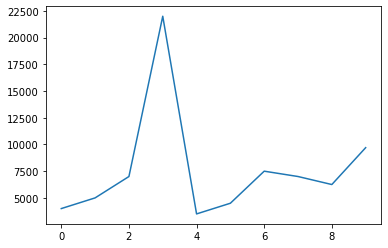

In [12]:
car_sales.info()
car_sales['Price'].plot()

In [13]:
car_sales_missing_csv = pd.read_csv('car-sales-missing-data.csv')

In [14]:
# Fillna values in place
car_sales_missing_csv['Odometer'].fillna(car_sales_missing_csv['Odometer'].mean(), inplace=True)

In [15]:
# Saved the dropped na's into a diff variable so you can access original
car_sales_missing_csv_dropped  = car_sales_missing_csv.dropna()

In [16]:
# Create column in pd from series
seats_column = pd.Series([5,5,5,5,5])
car_sales_missing_csv['Seats'] = seats_column
car_sales_missing_csv['Seats'].fillna(5, inplace=True)

In [17]:
# Create column from python list
# Must be same length as the dataframe, unlike series
fuel_economy = [7.5, 9.2, 5.0, 9.6, 4.7, 8.7, 7.6, 8.7, 3.0, 4.5]
car_sales_missing_csv['Fuel per 100KM'] = fuel_economy
car_sales_missing_csv

,Make,Colour,Odometer,Doors,Price,Seats,Fuel per 100KM
0,Toyota,White,150043.000000,4.0,"$4,000",5.0,7.5
1,Honda,Red,87899.000000,4.0,"$5,000",5.0,9.2
2,Toyota,Blue,92302.666667,3.0,"$7,000",5.0,5.0
3,BMW,Black,11179.000000,5.0,"$22,000",5.0,9.6
4,Nissan,White,213095.000000,4.0,"$3,500",5.0,4.7
5,Toyota,Green,92302.666667,4.0,"$4,500",5.0,8.7
6,Honda,NaN,92302.666667,4.0,"$7,500",5.0,7.6
7,Honda,Blue,92302.666667,4.0,NaN,5.0,8.7
8,Toyota,White,60000.000000,NaN,NaN,5.0,3.0
9,NaN,White,31600.000000,4.0,"$9,700",5.0,4.5


In [18]:
# Mathematical operators to create column from current data
car_sales_missing_csv['Total fuel used'] = car_sales_missing_csv['Odometer']/100 * car_sales_missing_csv['Fuel per 100KM']

In [19]:
# Create column from single value
car_sales_missing_csv['Wheels'] = 4

In [20]:
car_sales_missing_csv['Passed Road Safety'] = True
car_sales_missing_csv['Passed Road Safetyy'] = True

In [21]:
# To delete columns, add axis = 1. To delete rows, axis=0
car_sales_missing_csv.drop("Passed Road Safetyy", axis=1, inplace=True)

In [22]:
car_sales_missing_shuffled = car_sales_missing_csv.sample(frac=1)
car_sales_missing_shuffled

,Make,Colour,Odometer,Doors,Price,Seats,Fuel per 100KM,Total fuel used,Wheels,Passed Road Safety
8,Toyota,White,60000.000000,NaN,NaN,5.0,3.0,1800.000000,4,True
5,Toyota,Green,92302.666667,4.0,"$4,500",5.0,8.7,8030.332000,4,True
2,Toyota,Blue,92302.666667,3.0,"$7,000",5.0,5.0,4615.133333,4,True
9,NaN,White,31600.000000,4.0,"$9,700",5.0,4.5,1422.000000,4,True
0,Toyota,White,150043.000000,4.0,"$4,000",5.0,7.5,11253.225000,4,True
6,Honda,NaN,92302.666667,4.0,"$7,500",5.0,7.6,7015.002667,4,True
7,Honda,Blue,92302.666667,4.0,NaN,5.0,8.7,8030.332000,4,True
3,BMW,Black,11179.000000,5.0,"$22,000",5.0,9.6,1073.184000,4,True
4,Nissan,White,213095.000000,4.0,"$3,500",5.0,4.7,10015.465000,4,True
1,Honda,Red,87899.000000,4.0,"$5,000",5.0,9.2,8086.708000,4,True


In [23]:
car_sales_missing_shuffled["Odometer"] = car_sales_missing_shuffled['Odometer'].apply(lambda x: x/1.6)

In [24]:
car_sales_missing_shuffled

,Make,Colour,Odometer,Doors,Price,Seats,Fuel per 100KM,Total fuel used,Wheels,Passed Road Safety
8,Toyota,White,37500.000000,NaN,NaN,5.0,3.0,1800.000000,4,True
5,Toyota,Green,57689.166667,4.0,"$4,500",5.0,8.7,8030.332000,4,True
2,Toyota,Blue,57689.166667,3.0,"$7,000",5.0,5.0,4615.133333,4,True
9,NaN,White,19750.000000,4.0,"$9,700",5.0,4.5,1422.000000,4,True
0,Toyota,White,93776.875000,4.0,"$4,000",5.0,7.5,11253.225000,4,True
6,Honda,NaN,57689.166667,4.0,"$7,500",5.0,7.6,7015.002667,4,True
7,Honda,Blue,57689.166667,4.0,NaN,5.0,8.7,8030.332000,4,True
3,BMW,Black,6986.875000,5.0,"$22,000",5.0,9.6,1073.184000,4,True
4,Nissan,White,133184.375000,4.0,"$3,500",5.0,4.7,10015.465000,4,True
1,Honda,Red,54936.875000,4.0,"$5,000",5.0,9.2,8086.708000,4,True


## Creating arrays

If you are working with numpy data use `np.sum()`, if you working with python data use `sum()` method, the difference is drastic!

In [25]:
massive = np.random.random(100000)
%timeit sum(massive)
%timeit np.sum(massive)

5.36 ms ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.3 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Manipulating arrays

### Reshaping & transposing

In [37]:
a2 = np.array([[1, 2, 3.3],
             [4, 5, 6.5]])
a3 = np.array([[[1,2,3],
              [4,5,6],
              [7,8,9]],
               
              [[10, 11, 12],
              [13, 14, 15],
              [16, 17, 18]]])

In [54]:
print(a2.shape, a3.shape)

(2, 3) (2, 3, 3)


Can only multiple (hadamard product) if shape is equivalent or trailing dimension is 1. With dot product, column of the first must be equal to row of the second matrix

In [40]:
a2_reshape = a2.reshape(2, 3, 1)
a2_reshape * a3

array([[[  1. ,   2. ,   3. ],
        [  8. ,  10. ,  12. ],
        [ 23.1,  26.4,  29.7]],

       [[ 40. ,  44. ,  48. ],
        [ 65. ,  70. ,  75. ],
        [104. , 110.5, 117. ]]])

Transpose switches the axises (columns become rows and rows become columns)

In [41]:
a2.T

array([[1. , 4. ],
       [2. , 5. ],
       [3.3, 6.5]])

### Dot product example

![](6-step-ml-framework.png)

In [48]:
np.random.seed(0)
# Number of jars sold
sales_amount = np.random.randint(20, size=(5,3))

weekly_sales = pd.DataFrame(sales_amount,
                           index=['Mon', 'Tues', 'Weds', 'Thurs', 'Fri'],
                           columns=['Almond butter', 'Peanut butter', 'Cashew butter'])
weekly_sales

prices = np.array([10, 8, 12]).reshape(1,3)

butter_prices = pd.DataFrame(prices,
                            index=['Price'],
                            columns= ['Almond butter', 'Peanut butter', 'Cashew butter'])

In [63]:
prices.shape, sales_amount.shape

((1, 3), (5, 3))

Because shape isn't aligned, transpose

In [64]:
total_sales = prices.dot(sales_amount.T)
prices.shape, sales_amount.T.shape

((1, 3), (3, 5))

In [67]:
butter_prices.shape, weekly_sales.shape

((1, 3), (5, 3))

In [74]:
daily_sales = butter_prices.dot(weekly_sales.T)

ValueError: matrices are not aligned

In [89]:
weekly_sales['Total ($)'] = daily_sales.T
# weekly_sales.drop(['Total($)'], axis=1, inplace=True)
weekly_sales

,Almond butter,Peanut butter,Cashew butter,Total ($)
Mon,12,15,0,240
Tues,3,3,7,138
Weds,9,19,18,458
Thurs,4,6,12,232
Fri,1,6,7,142


## Image data

Use in markdown mode!
![ScreenShot](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/1200px-Grosser_Panda.JPG)

In [97]:
# Turn image into numpy array
from matplotlib.image import imread

panda = imread('images/panda.png')
panda.size, panda.shape, panda.ndim

(24465000, (2330, 3500, 3), 3)

## Graphs and visualisation

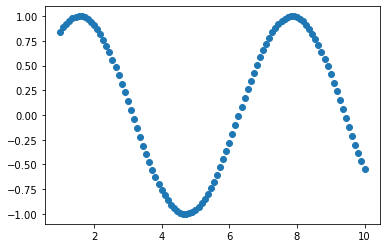

In [7]:
x = np.linspace(1,10, 100)
fig,ax = plt.subplots()
ax.scatter(x, np.sin(x))

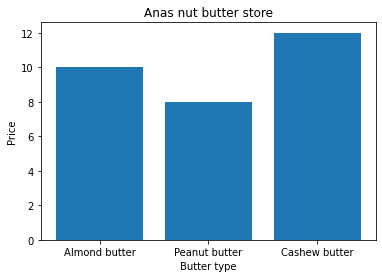

In [9]:
# Make graph from dictionary
nut_butter = {"Almond butter" : 10,
             "Peanut butter" : 8,
             "Cashew butter" : 12}
fig, ax = plt.subplots()
ax.bar(nut_butter.keys(), nut_butter.values())
ax.set(title='Anas nut butter store',
      xlabel='Butter type',
      ylabel ='Price');

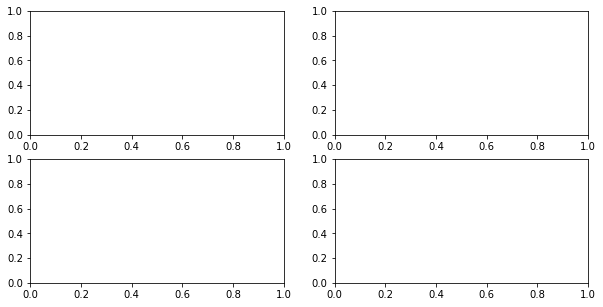

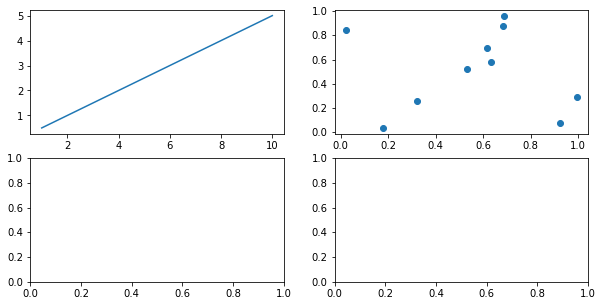

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,5))
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,5))
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));

/var/folders/h5/bt3x3zts4l3fw7s8t6j3dy340000gp/T/ipykernel_2542/3287228379.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales['Price'] = car_sales['Price'].str.replace("[\$\,\.]","")


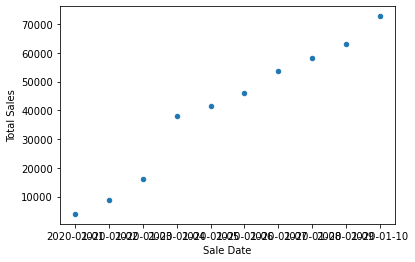

In [32]:
car_sales = pd.read_csv("car-sales-missing-data.csv")
car_sales['Price'] = car_sales['Price'].str.replace("[\$\,\.]","")
car_sales['Sale Date'] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales.fillna(0, inplace=True)

car_sales['Odometer'].replace(0, car_sales['Odometer'].median(), inplace=True)
car_sales['Price'] = car_sales['Price'].astype(int)
car_sales['Price'].replace(0, car_sales['Price'].median(), inplace=True)
car_sales

car_sales['Total Sales'] = car_sales['Price'].cumsum()
car_sales.plot(x="Sale Date", y="Total Sales", kind="scatter");


,Make,Colour,Odometer,Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043.0,4.0,4000,2020-01-01,4000
1,Honda,Red,87899.0,4.0,5000,2020-01-02,9000
2,Toyota,Blue,21389.5,3.0,7000,2020-01-03,16000
3,BMW,Black,11179.0,5.0,22000,2020-01-04,38000
4,Nissan,White,213095.0,4.0,3500,2020-01-05,41500
5,Toyota,Green,21389.5,4.0,4500,2020-01-06,46000
6,Honda,0,21389.5,4.0,7500,2020-01-07,53500
7,Honda,Blue,21389.5,4.0,4750,2020-01-08,58250
8,Toyota,White,60000.0,0.0,4750,2020-01-09,63000
9,0,White,31600.0,4.0,9700,2020-01-10,72700


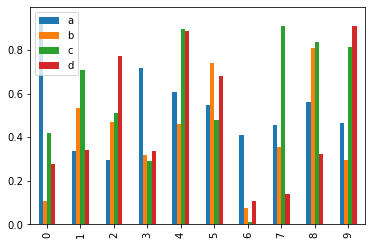

In [40]:
# Bar graph
x = np.random.rand(10,4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

# df.plot.bar();
df.plot(kind="bar");

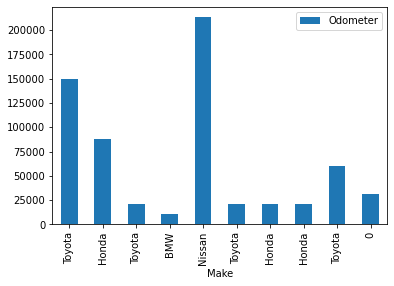

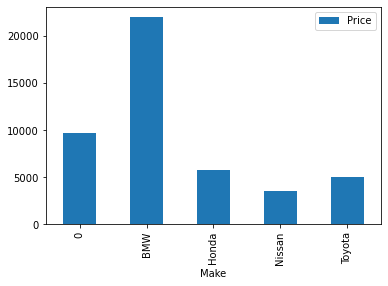

In [55]:
car_sales.plot(x='Make', y='Odometer', kind='bar');
car_sales_grouped = car_sales.groupby(car_sales['Make'], as_index=False).mean()
car_sales_grouped.plot(x='Make', y='Price',kind='bar');


In [29]:
series = pd.Series(["BMW", "Toyota", "Honda"])
colours = pd.Series(["Red", "Blue", "White"])
car_data = pd.DataFrame({"Car make" : series, "Colour": colours})

In [30]:
car_data

,Car make,Colour
0,BMW,Red
1,Toyota,Blue
2,Honda,White
